# Multiple Linear Regression

In [2]:
import numpy as np
import pandas as pd

import seaborn as sb
sb.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

from pylab import rcParams
rcParams['figure.figsize'] = 10, 8 

from collections import Counter
from sklearn.model_selection import cross_val_score

In [3]:
data = 'petrol_consumption.csv'

In [4]:
enrollment = pd.read_csv(data)
enrollment.head()


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [5]:
enrollment.columns = ['Petrol_tax', 'Average_income', 'Paved_highways', 'Population_driver_licence', 'Petrol_consumption']

/home/sairon/.local/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


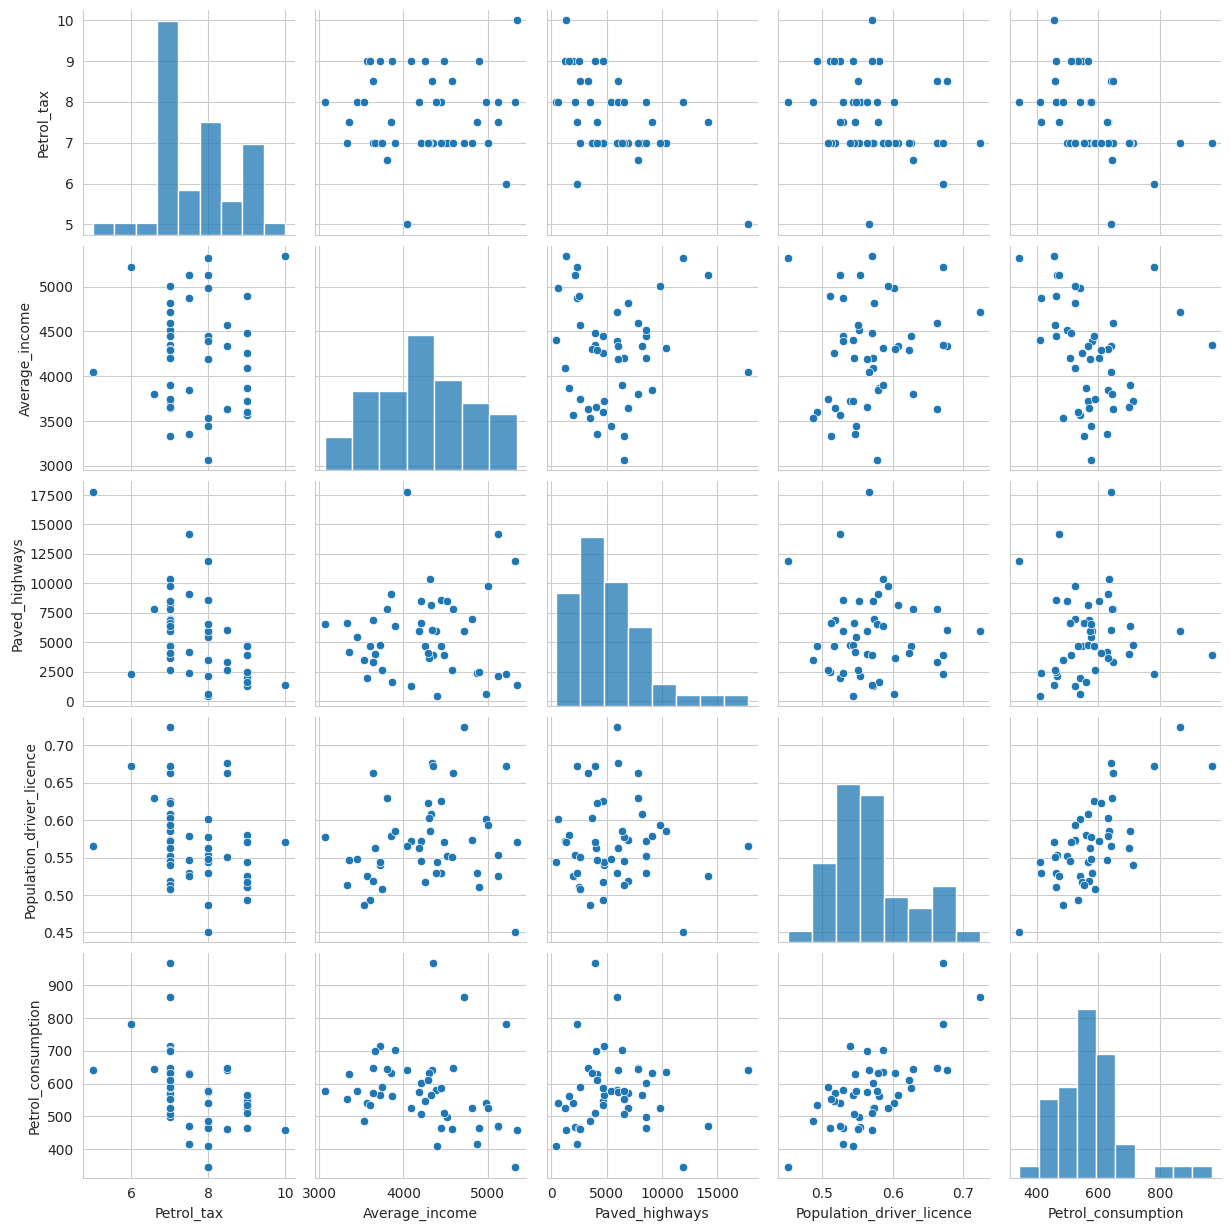

In [6]:
sb.pairplot(enrollment)

In [7]:
correlations = enrollment.corr()
correlations

,Petrol_tax,Average_income,Paved_highways,Population_driver_licence,Petrol_consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_driver_licence,-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


<Axes: >

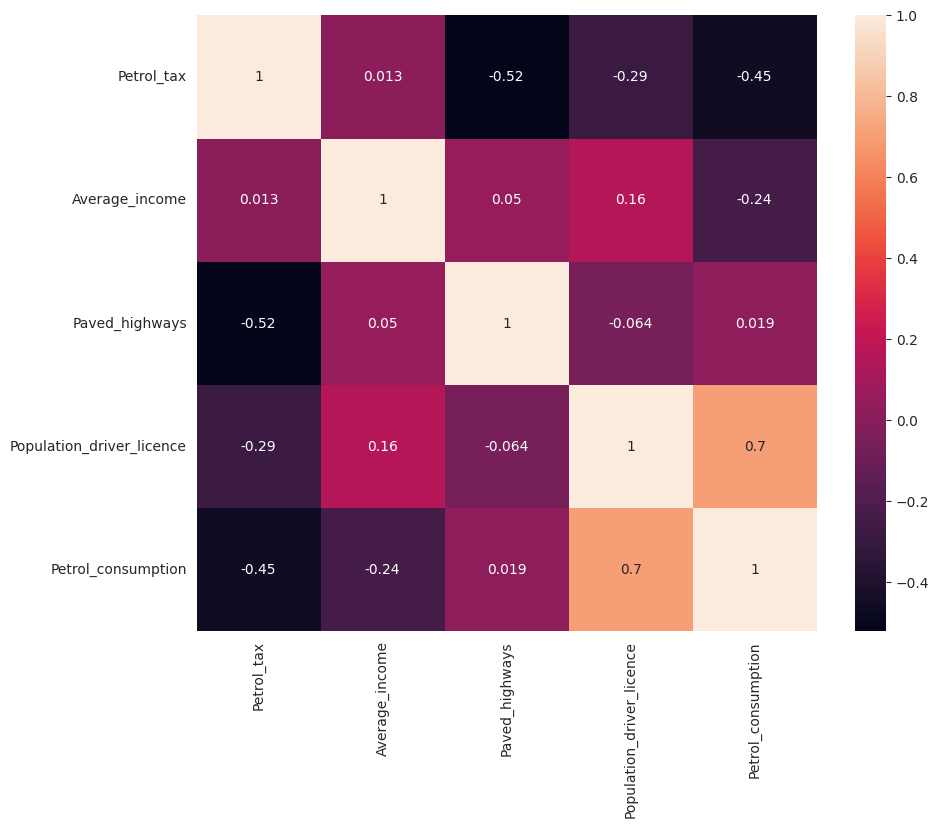

In [8]:
sb.heatmap(correlations, annot=True)

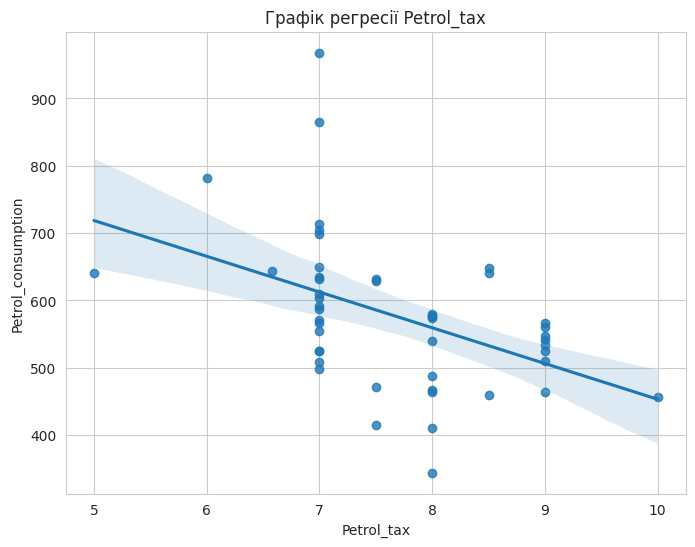

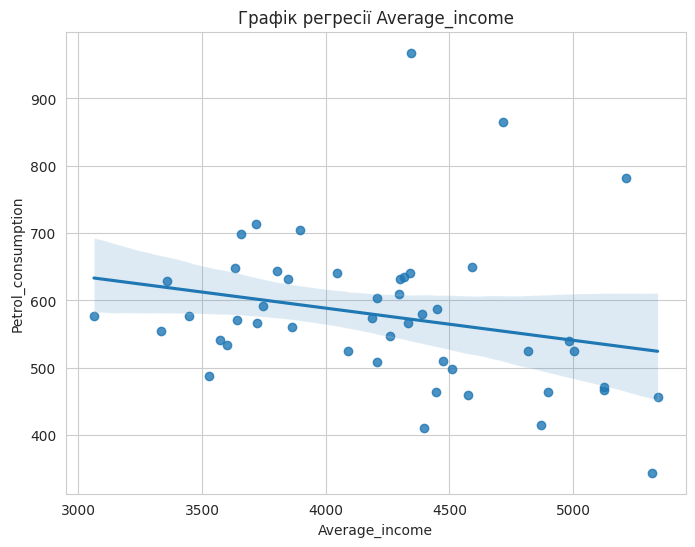

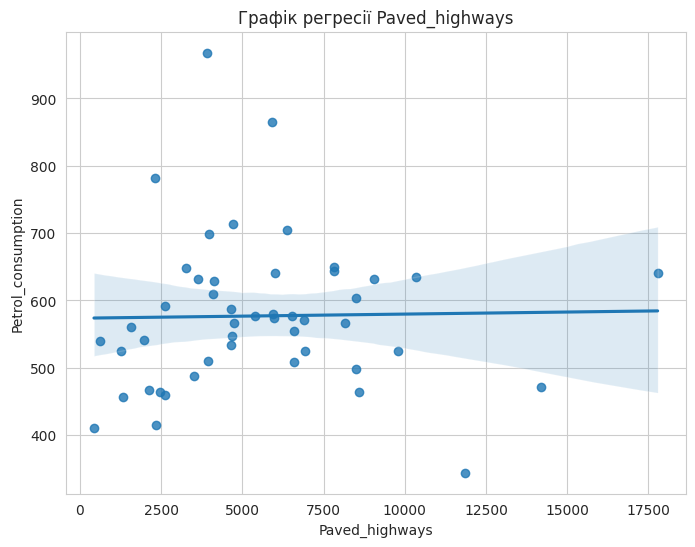

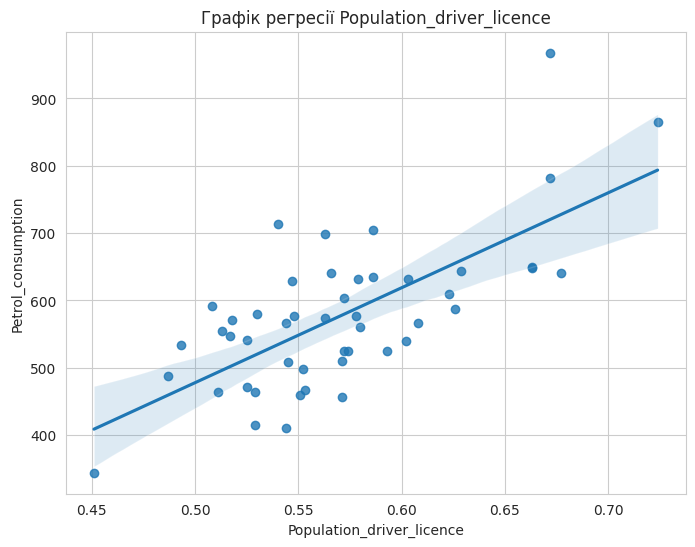

In [9]:
variables = ['Petrol_tax', 'Average_income', 'Paved_highways', 'Population_driver_licence']

for var in variables:
    plt.figure(figsize=(8, 6), dpi=100)
    sb.regplot(x=var, y='Petrol_consumption', data=enrollment).set(title=f'Графік регресії {var}')

In [10]:
enrollment_data = enrollment[['Average_income', 'Population_driver_licence']].values
enrollment_target = enrollment[['Petrol_consumption']].values
enrollment_data_names = ['Average_income', 'Population_driver_licence']

X, y = scale(enrollment_data), enrollment_target

In [11]:
# Missing Values
missing_values = X == np.NAN
X[missing_values == True] 

array([], dtype=float64)

In [12]:
LinReg = LinearRegression()

LinReg.fit(X, y)

print(LinReg.score(X, y))

0.6175098135108323


In [13]:
print('intercept: ', LinReg.intercept_)
print('slope: ', LinReg.coef_)

intercept:  [576.77083333]
slope:  [[-40.25784231  83.70870277]]


In [14]:
y_pred = LinReg.predict(X)
print('prediction: ', y_pred, sep='\n')

prediction: 
[[555.21393909]
 [589.93939547]
 [618.23955423]
 [469.18344745]
 [525.46443514]
 [499.75898   ]
 [318.38509246]
 [487.62785642]
 [499.18442553]
 [529.65033255]
 [504.68122911]
 [444.9266556 ]
 [541.56936515]
 [540.60694325]
 [627.81910786]
 [595.26110452]
 [581.85402549]
 [567.66371058]
 [777.48915225]
 [732.40874835]
 [693.18522483]
 [572.49713249]
 [439.81771944]
 [494.28860323]
 [523.72798318]
 [573.55110923]
 [599.01361415]
 [618.062073  ]
 [569.40527688]
 [504.28483778]
 [539.64486232]
 [553.79340739]
 [672.0707555 ]
 [603.94268238]
 [500.31205421]
 [697.43488645]
 [584.12258016]
 [625.12023401]
 [761.13070237]
 [724.49983673]
 [646.97173694]
 [607.13700345]
 [622.46347096]
 [516.94738215]
 [662.79569741]
 [561.17942213]
 [653.24802589]
 [557.42418485]]


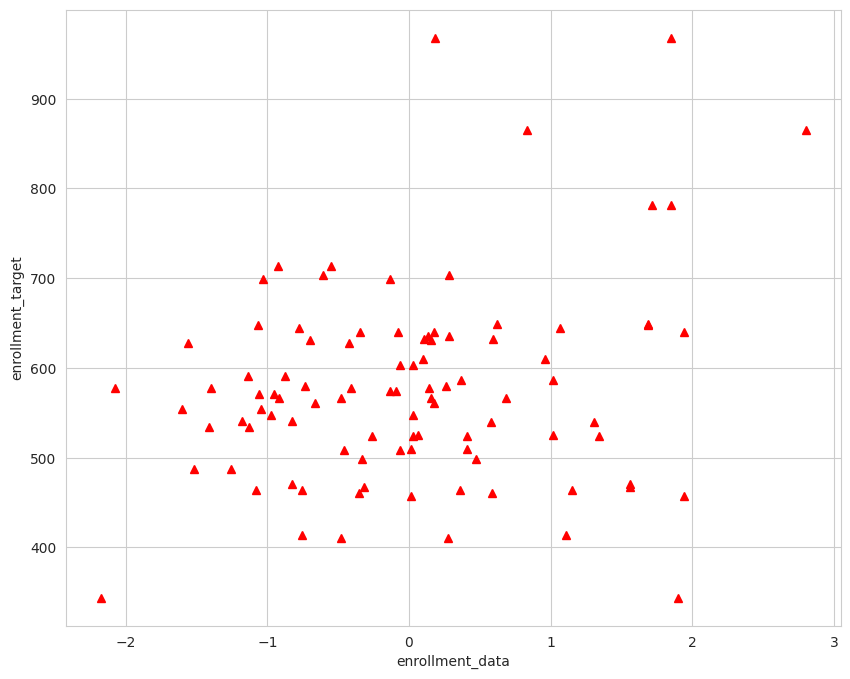

In [15]:
plt.plot(X, y, 'r^')
plt.xlabel('enrollment_data')
plt.ylabel('enrollment_target')
plt.show()

In [16]:
cv = cross_val_score(LinReg, X, y, cv=5)

In [17]:
cv

array([-0.20010444,  0.54042962,  0.58241348, -0.43589219,  0.26143617])